/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1sC3FkqslaBsj1CQTNPBlfZwfkhms_fTC
To: /content/Книжный АД :D.xlsx
100% 84.8k/84.8k [00:00<00:00, 48.9MB/s]
3.168263209558948 3.719890068437786
[0.47148612 0.19470916 0.12865632 0.05743406 0.03884394 0.02978792
 0.02506407 0.02203652 0.01393592 0.01312553 0.00492043]
[42.99281611 27.62832988 22.45830585 15.00535245 12.34022436 10.8064114
  9.91259286  9.2946485   7.39144396  7.17331552  4.39200588]
[[ 0.01588144  0.02390421  0.93929237  0.14765922  0.04311749  0.12965869
   0.11570076  0.13747466  0.10495777  0.14111035  0.11497072]
 [ 0.11273668 -0.01859252 -0.05337423  0.90917018 -0.03821647 -0.18432417
  -0.24853631 -0.19644604 -0.12729956  0.00496955  0.07401629]
 [-0.02413883 -0.01574068  0.28634272 -0.30328613

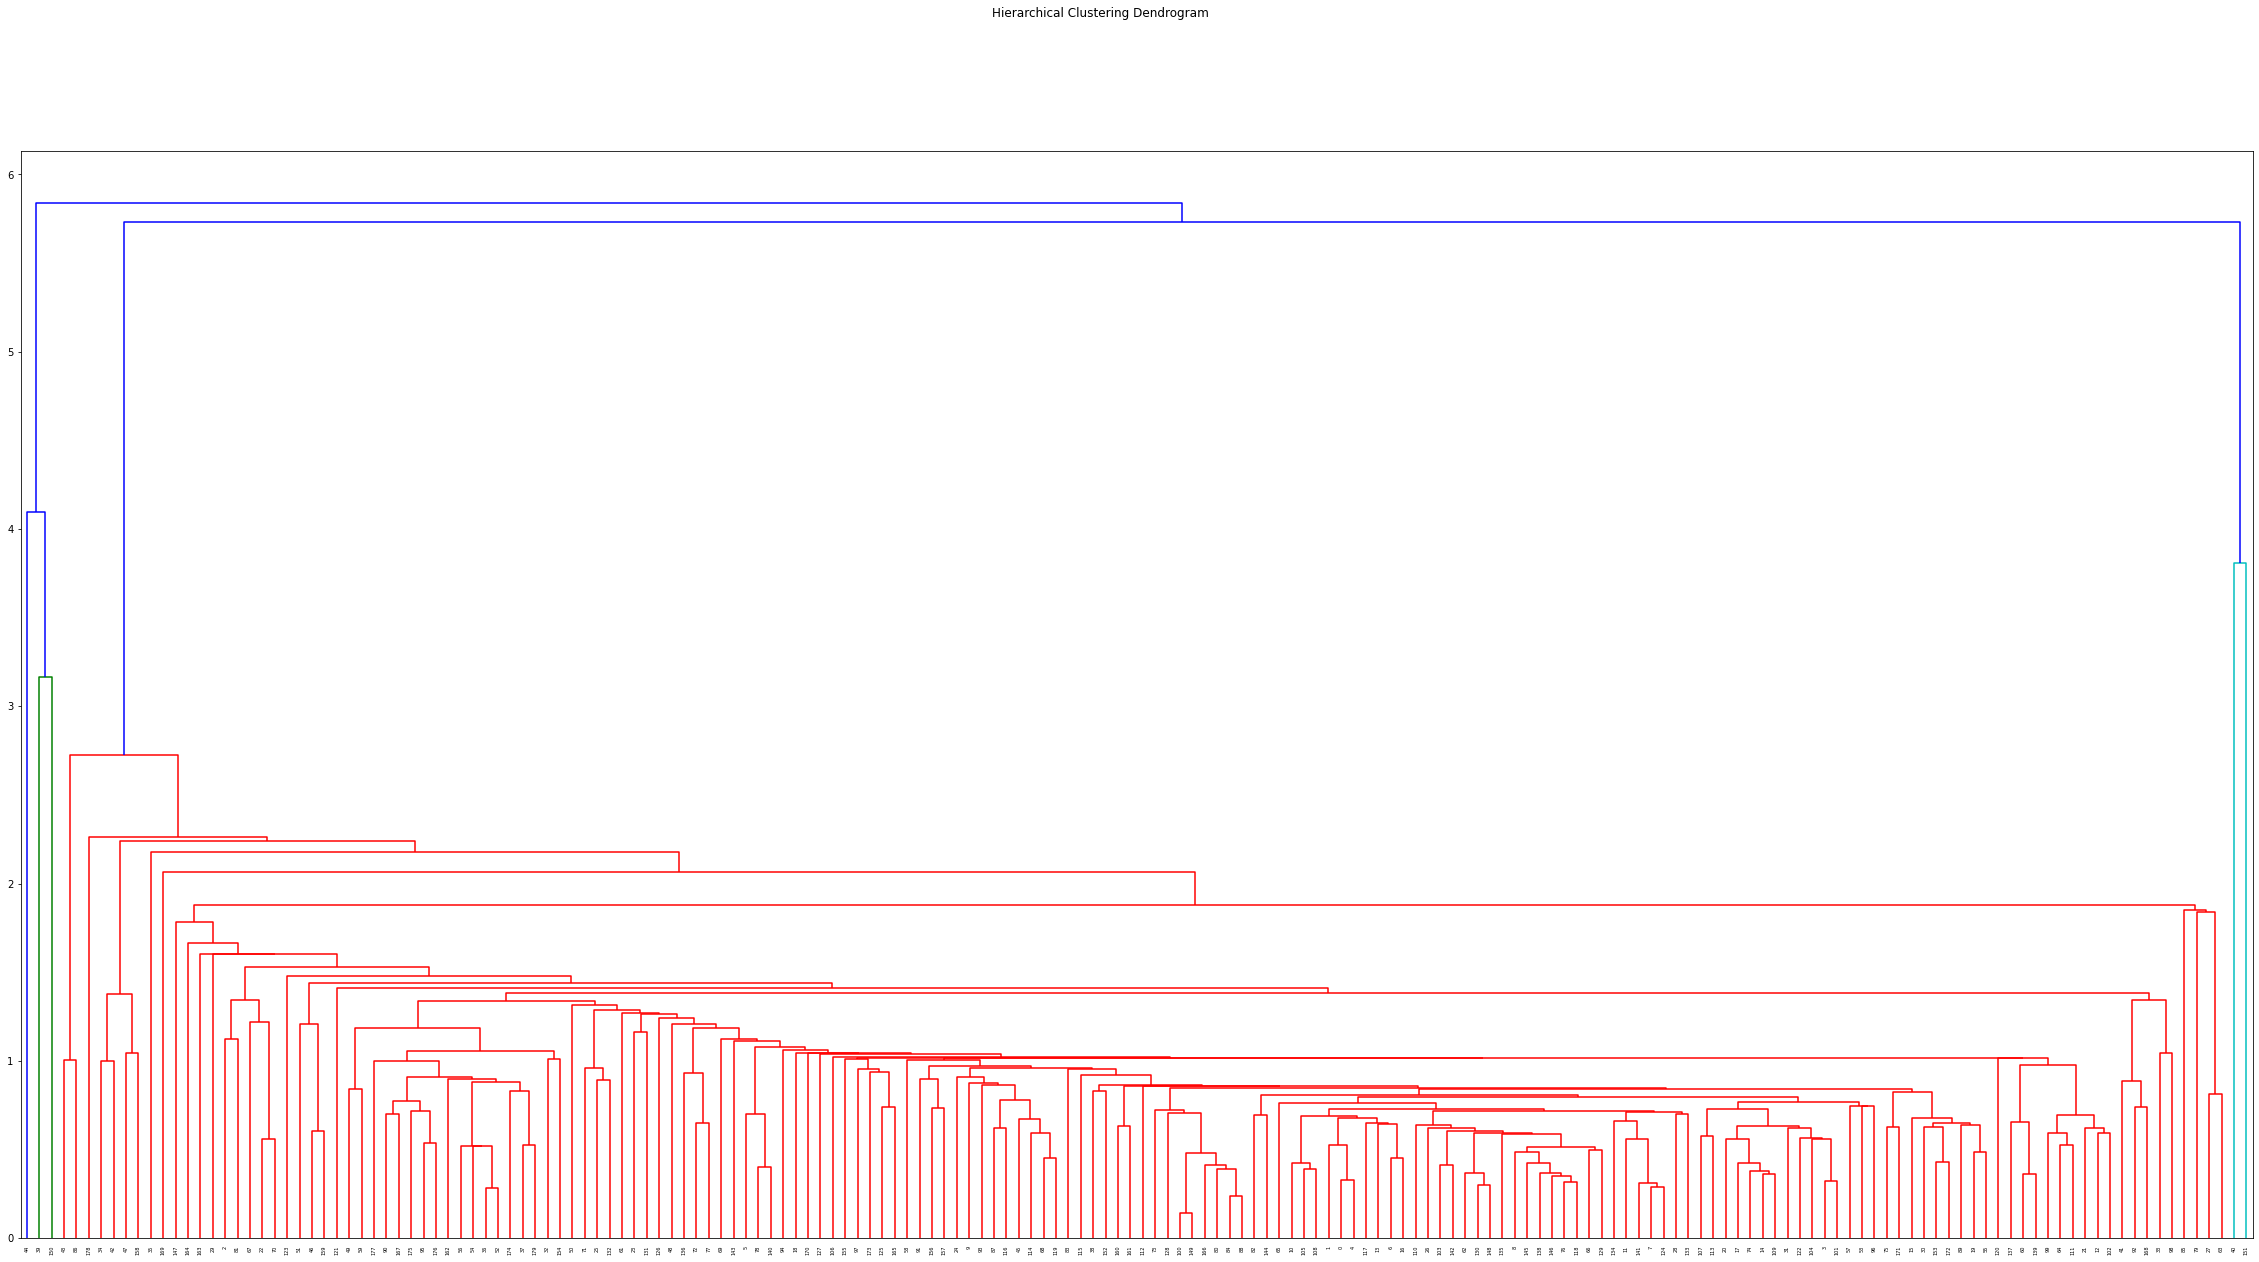

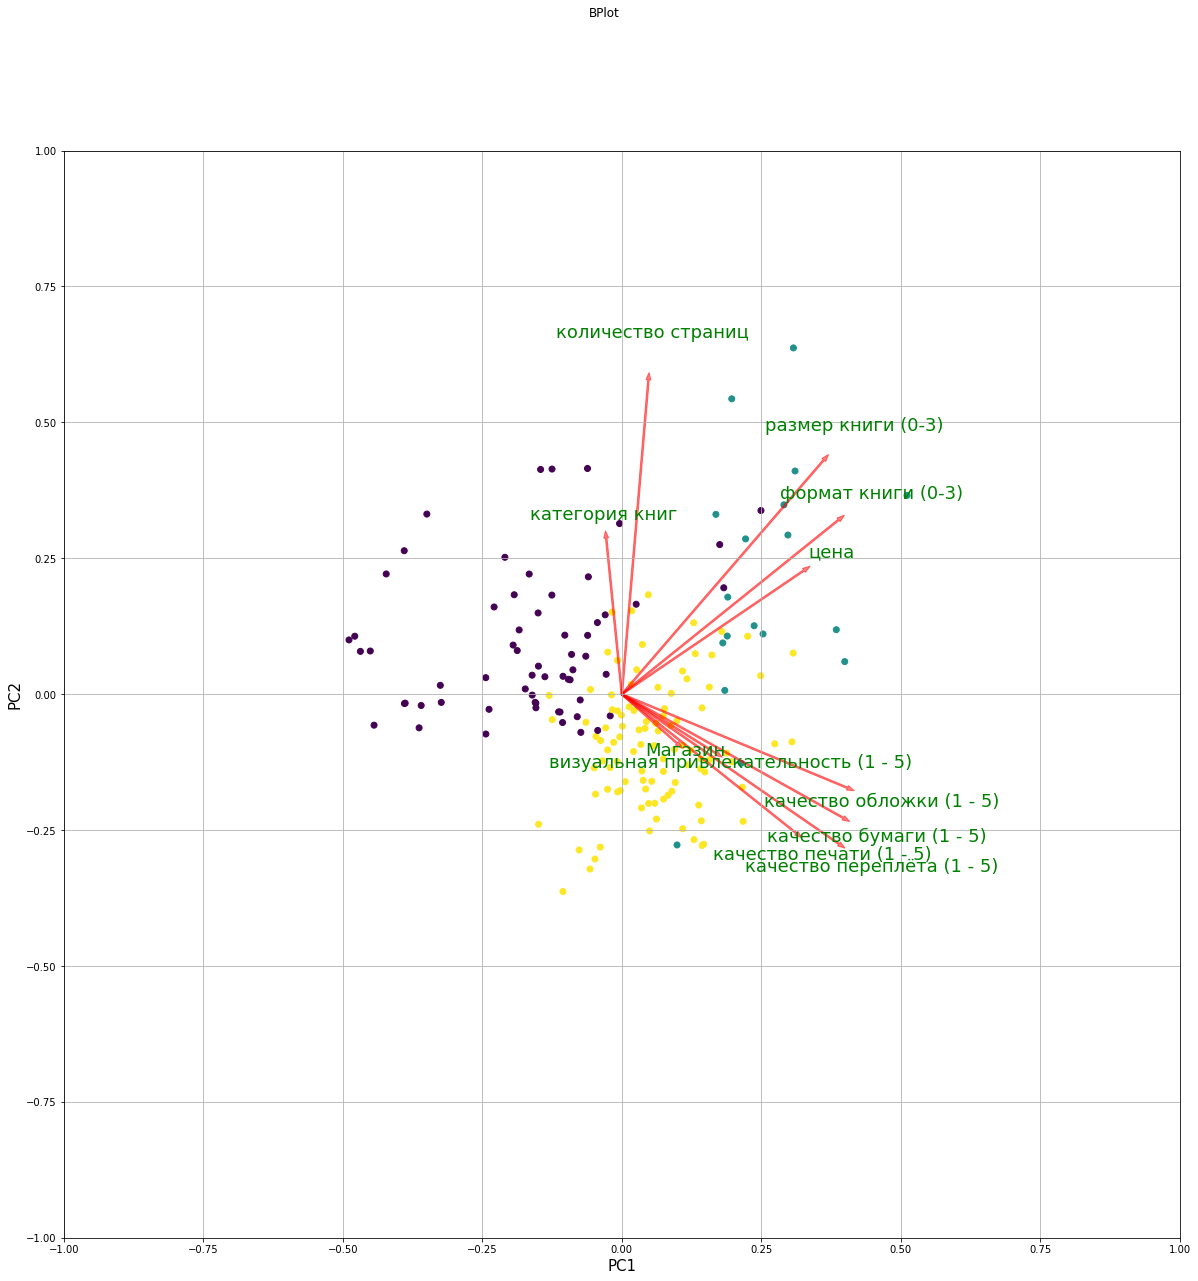

In [ ]:
from numpy.ma.extras import median
import pandas as pd
import numpy as np
import seaborn as sb
from scipy import stats
import matplotlib.pyplot as plt
from joblib import PrintTime
from sklearn.cluster import KMeans, dbscan
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS
from sklearn.cluster import SpectralClustering
from scipy.cluster import hierarchy
from joblib import PrintTime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import pandas as pd
from sklearn.preprocessing import StandardScaler
import statistics

!gdown --id 1sC3FkqslaBsj1CQTNPBlfZwfkhms_fTC

xl = pd.ExcelFile('/content/Книжный АД :D.xlsx')
main_df1 = xl.parse('Лист8') 
main_df2=xl.parse('Лист7')
main_df2["цена"] /= main_df2["цена"].mean()
main_df2["количество страниц"] /= main_df2["количество страниц"].mean()
main_df1["цена"] /= main_df1["цена"].mean()
main_df1["количество страниц"] /= main_df1["количество страниц"].mean()
main_df2["цена"] *= 4;
main_df2["количество страниц"] *= 4;
print(statistics.median(main_df2["цена"]),statistics.median(main_df2["количество страниц"]))

#0-бестселлеры 1-научпоп 2-классика
#0-читайгород 1-лабиринт 2-гвардия

#Z = hierarchy.linkage(main_df2,'single') #single,complete,average,weighted,centroid,median,ward
#fig=plt.figure(1,figsize=(20,20))
#fig.suptitle('Hierarchical Clustering Dendrogram')
#dn=hierarchy.dendrogram(Z)



pca=PCA(n_components=11).fit(main_df2)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)
print(pca.components_)
#print(pca.components_.shape)

A=np.array(pca.components_)
B=np.array(main_df2)
B=np.transpose(B)
C=A@B
#print(C)
D=C[0:3]
#print(D)
D=np.transpose(D)

Z = hierarchy.linkage(D,'single') #single,complete,average,weighted,centroid,median,ward
fig=plt.figure(1,figsize=(40,20))
fig.suptitle('Hierarchical Clustering Dendrogram')
dn=hierarchy.dendrogram(Z)
plt.savefig("dendogram",bbox_inches='tight', dpi=200)


categories=main_df2.columns
fig=plt.figure(2,figsize=(20,20))
fig.suptitle('BPlot')
X=main_df2
y=KMeans(n_clusters=3, random_state=0).fit_predict(D)
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)    
#pca = PCA()
x_new = pca.fit_transform(X)

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    #xs=D[:,0]
    #ys=D[:,2]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,c=y) #c=y
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5,width=0.003)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center',fontsize=18)
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center',fontsize=18)
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1),fontsize=15)
    plt.ylabel("PC{}".format(2),fontsize=15)
    plt.grid()

#Call the function. Use only the 2 PCs.
myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]),labels=categories)
plt.savefig("biplot",bbox_inches='tight', dpi=200)

